###Data Exploration
**Load the dataset** into a pandas DataFrame and display the first 5 rows.

In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pizza.csv")
df.head()

,Unnamed: 0,X,id,date,time,name,size,type,price
0,1,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,4,4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,5,5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50


**Display basic information** about the DataFrame including the number of rows and columns, data types, and memory usage.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  49574 non-null  int64  
 1   X           49574 non-null  int64  
 2   id          49574 non-null  object 
 3   date        49574 non-null  object 
 4   time        49574 non-null  object 
 5   name        49574 non-null  object 
 6   size        49574 non-null  object 
 7   type        49574 non-null  object 
 8   price       49574 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 3.4+ MB


**Generate summary statistics** for the numerical columns.

In [4]:
df.describe()

,Unnamed: 0,X,price
count,49574.000000,49574.000000,49574.000000
mean,24787.500000,24787.500000,16.497762
std,14310.925459,14310.925459,3.621954
min,1.000000,1.000000,9.750000
25%,12394.250000,12394.250000,12.750000
50%,24787.500000,24787.500000,16.500000
75%,37180.750000,37180.750000,20.250000
max,49574.000000,49574.000000,35.950000


**Display the unique values** in the "pizza name" and type columns

In [5]:
print("Number of unique pizzas:",end =' ')
print(len(df["name"].unique()))
print(df["name"].unique())

print("Number of unique types:",end =' ')
print(len(df["type"].unique()))
df["type"].unique()

Number of unique pizzas: 32
['hawaiian' 'classic_dlx' 'mexicana' 'thai_ckn' 'five_cheese' 'ital_supr'
 'prsc_argla' 'bbq_ckn' 'the_greek' 'spinach_supr' 'spin_pesto'
 'spicy_ital' 'ital_cpcllo' 'veggie_veg' 'green_garden' 'southw_ckn'
 'pepperoni' 'cali_ckn' 'ckn_pesto' 'big_meat' 'soppressata' 'four_cheese'
 'napolitana' 'mediterraneo' 'spinach_fet' 'ital_veggie' 'calabrese'
 'peppr_salami' 'sicilian' 'ckn_alfredo' 'pep_msh_pep' 'brie_carre']
Number of unique types: 4


array(['classic', 'veggie', 'chicken', 'supreme'], dtype=object)

**Count the number of occurrences** of each pizza size.

In [6]:
df["size"].value_counts()

size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: count, dtype: int64

### Data Cleaning
7. **Drop rows with missing values**.
8. **Fill missing values** in the "price" column with the mean price.
9. **Remove duplicate rows** from the dataset.


In [7]:
df['id'] = df['id'].str.replace('2015-','')
df.drop_duplicates()

,Unnamed: 0,X,id,date,time,name,size,type,price
0,1,1,000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2,000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,3,000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,4,4,000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,5,5,000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50
...,...,...,...,...,...,...,...,...,...
49569,49570,49570,021348,2015-12-31,21:23:10,four_cheese,L,veggie,17.95
49570,49571,49571,021348,2015-12-31,21:23:10,napolitana,S,classic,12.00
49571,49572,49572,021348,2015-12-31,21:23:10,ckn_alfredo,M,chicken,16.75
49572,49573,49573,021349,2015-12-31,22:09:54,mexicana,L,veggie,20.25


In [8]:
df.shape

(49574, 9)

**Check for missing values** in the dataset and remove unnessecary columns if any

In [9]:
df.isnull()
df.drop(df.iloc[:,0:2], axis=1, inplace = True)
df.head()

,id,date,time,name,size,type,price
0,000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50


**Convert the "date" column** to datetime format

In [10]:
df["date"] = pd.to_datetime(df["date"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      49574 non-null  object        
 1   date    49574 non-null  datetime64[ns]
 2   time    49574 non-null  object        
 3   name    49574 non-null  object        
 4   size    49574 non-null  object        
 5   type    49574 non-null  object        
 6   price   49574 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 2.6+ MB


**Create a new column** "year" extracted from the "date" column.

In [12]:
df["Year"] = df["date"].dt.year
df.head(1)
df["Year"].value_counts()

Year
2015    49574
Name: count, dtype: int64

### Data Transformation
12. **Create a new column** "month" extracted from the "date" column.

In [13]:
df["month"] = df["date"].dt.month

**Create a new column** "day of week" extracted from the "date" column.

In [14]:
df["day_of_week"] = df["date"].dt.day_of_week
df.head(30)
df.loc[101:200,['date','day_of_week']]

,date,day_of_week
101,2015-01-01,3
102,2015-01-01,3
103,2015-01-01,3
104,2015-01-01,3
105,2015-01-01,3
...,...,...
196,2015-01-02,4
197,2015-01-02,4
198,2015-01-02,4
199,2015-01-02,4


**Create a new column** "hour" extracted from the "time" column

In [15]:
df["time"] = pd.to_datetime(df["time"],format= '%H:%M:%S').dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           49574 non-null  object        
 1   date         49574 non-null  datetime64[ns]
 2   time         49574 non-null  object        
 3   name         49574 non-null  object        
 4   size         49574 non-null  object        
 5   type         49574 non-null  object        
 6   price        49574 non-null  float64       
 7   Year         49574 non-null  int32         
 8   month        49574 non-null  int32         
 9   day_of_week  49574 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(5)
memory usage: 3.2+ MB


In [16]:
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
df.head(1)

,id,date,time,name,size,type,price,Year,month,day_of_week,hour
0,000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25,2015,1,3,11


### Data Analysis
17. **Calculate the total revenue** generated from pizza sales.


In [17]:
print("Total Sales of 2015 : $",df["price"].sum())

Total Sales of 2015 : $ 817860.05


**Find the most popular pizza** based on the number of orders.

In [18]:
# Count the number of occurrences for each pizza name
top= df['name'].value_counts()
pizza = top.idxmax()
most_popular_count = top.max()
print("Most popular pizza : ",pizza,most_popular_count)

Most popular pizza :  classic_dlx 2453


**Find the least popular pizza** based on the number of orders.

In [19]:
least = df["name"].value_counts()
pizza = least.idxmin()
least_popular = least.min()
print("Most popular pizza : ",pizza,least_popular)

Most popular pizza :  brie_carre 490


**Calculate the average price** of each pizza type.

In [20]:
average_price_per_type = df.groupby('type')['price'].mean()

print(average_price_per_type)

type
chicken    17.730271
classic    14.780568
supreme    17.368566
veggie     16.627217
Name: price, dtype: float64


**Calculate the total number of pizzas** sold for each pizza size.

In [21]:
total = df['size'].value_counts()
print(total)

size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: count, dtype: int64


### Grouping and Aggregation
22. **Group by pizza name** and calculate the total revenue for each pizza.


In [22]:
df.groupby('name')['price'].sum()

name
bbq_ckn         42768.00
big_meat        22968.00
brie_carre      11588.50
calabrese       15934.25
cali_ckn        41409.50
ckn_alfredo     16900.25
ckn_pesto       16701.75
classic_dlx     38180.50
five_cheese     26066.50
four_cheese     32265.70
green_garden    13955.75
hawaiian        32273.25
ital_cpcllo     25094.00
ital_supr       33476.75
ital_veggie     16019.25
mediterraneo    15360.50
mexicana        26780.75
napolitana      24087.00
pep_msh_pep     18834.50
pepperoni       30161.75
peppr_salami    25529.00
prsc_argla      24193.25
sicilian        30940.50
soppressata     16425.75
southw_ckn      34705.75
spicy_ital      34831.25
spin_pesto      15596.00
spinach_fet     23271.25
spinach_supr    15277.75
thai_ckn        43434.25
the_greek       28454.10
veggie_veg      24374.75
Name: price, dtype: float64

**Group by customer id** and count the number of orders placed by each customer.

In [23]:
method1 = df['id'].value_counts()
method2 = df.groupby('id').size()
print("Method 1",method1,"\nMethod_2",method2)

Method 1 id
018845    28
010760    25
018513    15
021158    15
020163    15
          ..
010393     1
010394     1
010395     1
010401     1
021350     1
Name: count, Length: 21350, dtype: int64 
Method_2 id
000001    1
000002    5
000003    2
000004    1
000005    1
         ..
021346    4
021347    4
021348    3
021349    1
021350    1
Length: 21350, dtype: int64


**Group by month** and calculate the total revenue for each month.

In [24]:
df.groupby('month')['price'].sum()

month
1     69793.30
2     65159.60
3     70397.10
4     68736.80
5     71402.75
6     68230.20
7     72557.90
8     68278.25
9     64180.05
10    64027.60
11    70395.35
12    64701.15
Name: price, dtype: float64

25. **Group by day of week** and calculate the average number of orders.
26. **Group by hour** and find the peak hour for pizza sales.


In [25]:
df.groupby('day_of_week').size()
df.groupby('hour').size()

hour
9        4
10      18
11    2728
12    6776
13    6413
14    3613
15    3216
16    4239
17    5211
18    5417
19    4406
20    3534
21    2545
22    1386
23      68
dtype: int64

### Filtering and Slicing
27. **Filter the dataset** to show only orders of "classic" pizzas.


In [26]:
df[df['type'] == 'classic']

,id,date,time,name,size,type,price,Year,month,day_of_week,hour
0,000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25,2015,1,3,11
1,000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00,2015,1,3,11
11,000006,2015-01-01,12:29:36,the_greek,S,classic,12.00,2015,1,3,12
18,000009,2015-01-01,12:52:01,ital_cpcllo,L,classic,20.50,2015,1,3,12
21,000009,2015-01-01,12:52:01,classic_dlx,S,classic,12.00,2015,1,3,12
...,...,...,...,...,...,...,...,...,...,...,...
49554,021343,2015-12-31,20:27:23,classic_dlx,M,classic,16.00,2015,12,3,20
49556,021344,2015-12-31,20:43:46,pepperoni,M,classic,12.50,2015,12,3,20
49559,021345,2015-12-31,20:44:43,classic_dlx,S,classic,12.00,2015,12,3,20
49564,021346,2015-12-31,20:51:07,big_meat,S,classic,12.00,2015,12,3,20


**Filter the dataset** to show only large (L) pizzas.

In [27]:
df[df['size']=='L']

,id,date,time,name,size,type,price,Year,month,day_of_week,hour
3,000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75,2015,1,3,11
4,000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50,2015,1,3,11
5,000002,2015-01-01,11:57:40,ital_supr,L,supreme,20.75,2015,1,3,11
6,000003,2015-01-01,12:12:28,prsc_argla,L,supreme,20.75,2015,1,3,12
14,000009,2015-01-01,12:52:01,ital_supr,L,supreme,20.75,2015,1,3,12
...,...,...,...,...,...,...,...,...,...,...,...
49558,021344,2015-12-31,20:43:46,calabrese,L,supreme,20.25,2015,12,3,20
49561,021346,2015-12-31,20:51:07,soppressata,L,supreme,20.75,2015,12,3,20
49566,021347,2015-12-31,21:14:37,southw_ckn,L,chicken,20.75,2015,12,3,21
49569,021348,2015-12-31,21:23:10,four_cheese,L,veggie,17.95,2015,12,3,21


**Filter the dataset** to show orders with a price greater than $20.

In [28]:
df[df['price']>20]

,id,date,time,name,size,type,price,Year,month,day_of_week,hour
3,000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75,2015,1,3,11
5,000002,2015-01-01,11:57:40,ital_supr,L,supreme,20.75,2015,1,3,11
6,000003,2015-01-01,12:12:28,prsc_argla,L,supreme,20.75,2015,1,3,12
14,000009,2015-01-01,12:52:01,ital_supr,L,supreme,20.75,2015,1,3,12
16,000009,2015-01-01,12:52:01,spin_pesto,L,veggie,20.75,2015,1,3,12
...,...,...,...,...,...,...,...,...,...,...,...
49555,021343,2015-12-31,20:27:23,spicy_ital,L,supreme,20.75,2015,12,3,20
49558,021344,2015-12-31,20:43:46,calabrese,L,supreme,20.25,2015,12,3,20
49561,021346,2015-12-31,20:51:07,soppressata,L,supreme,20.75,2015,12,3,20
49566,021347,2015-12-31,21:14:37,southw_ckn,L,chicken,20.75,2015,12,3,21


**Filter the dataset** to show orders placed on weekends.

In [29]:
df[df["day_of_week"] >= 5]

,id,date,time,name,size,type,price,Year,month,day_of_week,hour
327,000137,2015-01-03,11:34:10,mediterraneo,L,veggie,20.25,2015,1,5,11
328,000137,2015-01-03,11:34:10,spicy_ital,M,supreme,16.50,2015,1,5,11
329,000137,2015-01-03,11:34:10,pepperoni,S,classic,9.75,2015,1,5,11
330,000138,2015-01-03,11:44:50,ital_veggie,L,veggie,21.00,2015,1,5,11
331,000138,2015-01-03,11:44:50,sicilian,M,supreme,16.25,2015,1,5,11
...,...,...,...,...,...,...,...,...,...,...,...
49127,021177,2015-12-27,20:37:13,hawaiian,S,classic,10.50,2015,12,6,20
49128,021177,2015-12-27,20:37:13,thai_ckn,L,chicken,20.75,2015,12,6,20
49129,021178,2015-12-27,21:02:45,classic_dlx,M,classic,16.00,2015,12,6,21
49130,021179,2015-12-27,21:56:56,calabrese,M,supreme,16.25,2015,12,6,21


**Filter the dataset** to show orders placed after 6 PM.

In [30]:
df[df['hour'] >= 18]

,id,date,time,name,size,type,price,Year,month,day_of_week,hour
112,000046,2015-01-01,18:25:51,thai_ckn,M,chicken,16.75,2015,1,3,18
113,000046,2015-01-01,18:25:51,ckn_pesto,L,chicken,20.75,2015,1,3,18
114,000046,2015-01-01,18:25:51,classic_dlx,L,classic,20.50,2015,1,3,18
115,000047,2015-01-01,18:26:34,veggie_veg,S,veggie,12.00,2015,1,3,18
116,000047,2015-01-01,18:26:34,southw_ckn,L,chicken,20.75,2015,1,3,18
...,...,...,...,...,...,...,...,...,...,...,...
49569,021348,2015-12-31,21:23:10,four_cheese,L,veggie,17.95,2015,12,3,21
49570,021348,2015-12-31,21:23:10,napolitana,S,classic,12.00,2015,12,3,21
49571,021348,2015-12-31,21:23:10,ckn_alfredo,M,chicken,16.75,2015,12,3,21
49572,021349,2015-12-31,22:09:54,mexicana,L,veggie,20.25,2015,12,3,22


### Data Visualization
32. **Plot a histogram** of pizza prices.


(array([ 8943.,  7375., 15261.,  2725., 14200.,   490.,   552.,     0.,
            0.,    28.]),
 array([ 9.75, 12.37, 14.99, 17.61, 20.23, 22.85, 25.47, 28.09, 30.71,
        33.33, 35.95]),
 <BarContainer object of 10 artists>)

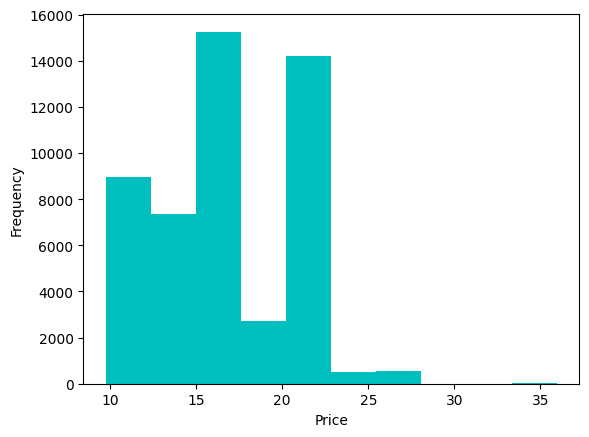

In [31]:
import matplotlib.pyplot as plt
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.hist(df['price'],color = 'c')

**Plot a bar chart** showing the total revenue for each pizza type.

<BarContainer object of 4 artists>

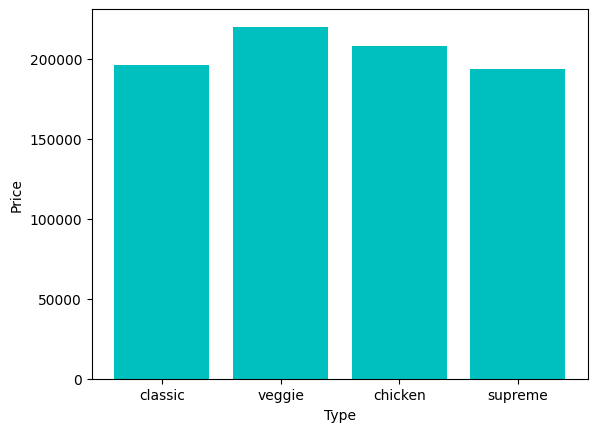

In [32]:
x = df['type'].unique()
y = df.groupby('type')['price'].sum()
plt.xlabel('Type')
plt.ylabel('Price')
plt.bar(x,y,color='c')


**Plot a line chart** showing the total revenue per month.

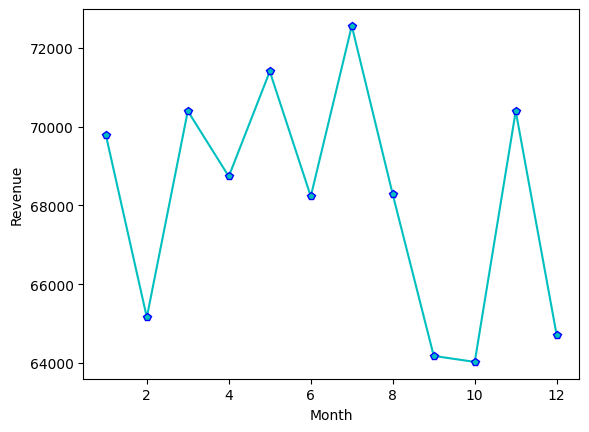

In [33]:
month = df['month'].unique()
price = df.groupby('month')['price'].sum()
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.plot(month,price,color = 'c',marker = 'p',markeredgecolor = 'b')
plt.show()

**Plot a pie chart** showing the proportion of sales by pizza size.

([<matplotlib.patches.Wedge at 0x7e76bf7c78e0>,
 [Text(0.14162572618670585, 1.090844697325008, 'L'),
  Text(-0.8415264239190244, -0.7084019182964277, 'M'),
  Text(0.836129405161804, -0.8607482894689759, 'S'),
  Text(1.2975180756388176, -0.08029223742392187, 'XL'),
  Text(1.3999895335982722, -0.005413484579478064, 'XXL')],
 [Text(0.07725039610183955, 0.5950061985409134, '45.9%'),
  Text(-0.45901441304674057, -0.38640104634350597, '30.5%'),
  Text(0.48774215301105234, -0.5021031688569025, '21.8%'),
  Text(0.7984726619315801, -0.04941060764549038, '1.7%'),
  Text(0.8999932715988892, -0.0034800972296644694, '0.1%')])

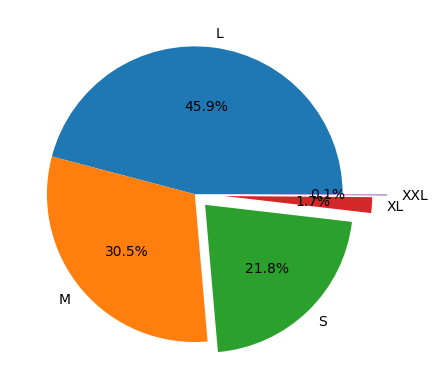

In [34]:
size = df.groupby('size')['price'].sum()
size_labels = ['L','M','S','XL','XXL']
expl = [0,0,0.1,0.2,0.3]
plt.pie(size,labels = size_labels,explode= expl,autopct = '%1.1F%%')

**Create a heatmap** of sales by hour and day of the week.

hour         9   10   11    12    13   14   15   16   17   18   19   20   21  \
day_of_week                                                                    
0             0   3  472  1126   803  460  411  541  712  666  537  360  278   
1             4   0  426  1105  1018  488  420  630  669  639  600  476  272   
2             0   5  534  1058   938  516  465  571  772  756  516  398  271   
3             0   5  468  1149  1131  574  468  650  856  807  587  451  216   
4             0   0  388  1101  1040  525  441  578  759  936  748  706  613   
5             0   3  208   633   794  530  525  646  729  881  841  738  591   
6             0   2  232   604   689  520  486  623  714  732  577  405  304   

hour          22  23  
day_of_week           
0            112   4  
1            148   0  
2            146   0  
3            113   3  
4            381  26  
5            343  31  
6            143   4  


Text(0.5, 1.0, 'Heatmap of Sales by Hour and Day of the Week')

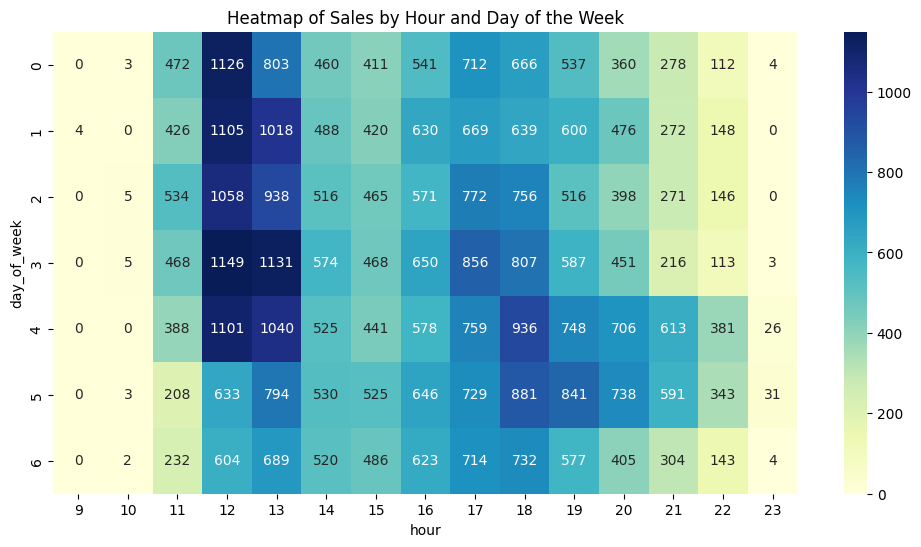

In [35]:
import seaborn as sns

# Create a pivot table to aggregate sales by hour and day of the week
pivot_table = df.pivot_table(values='id', index='day_of_week', columns='hour', aggfunc='count', fill_value=0)
print(pivot_table)

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Sales by Hour and Day of the Week')

**Calculate the correlation** between pizza size and price.

In [36]:
#covariance/product of sds
size_map = {'S': 1, 'M': 2, 'L': 3, 'XL': 4, 'XXL': 5}
df['size_map'] = df['size'].map(size_map)
corr = df[['size_map','price']].corr()
print("Correlation",corr)

Correlation           size_map     price
size_map  1.000000  0.884257
price     0.884257  1.000000


**Identify trends** in pizza sales over time.**

In [37]:
daily = df.groupby('day_of_week')['price'].sum()
print(daily)

day_of_week
0    107329.55
1    114133.80
2    114408.40
3    123528.50
4    136073.90
5    123182.40
6     99203.50
Name: price, dtype: float64


In [38]:
daily_sales = df.groupby('date').agg({'price': 'sum', 'id': 'count'}).rename(columns={'price': 'total_revenue', 'id': 'order_count'})
print(daily_sales)

monthly_sales = df.groupby('month').agg({'price': 'sum', 'id': 'count'}).rename(columns={'price': 'total_revenue', 'id': 'order_count'})
print(monthly_sales)

            total_revenue  order_count
date                                  
2015-01-01        2713.85          162
2015-01-02        2731.90          165
2015-01-03        2662.40          158
2015-01-04        1755.45          106
2015-01-05        2065.95          125
...                   ...          ...
2015-12-27        1419.00           89
2015-12-28        1637.20          102
2015-12-29        1353.25           80
2015-12-30        1337.80           82
2015-12-31        2916.00          178

[358 rows x 2 columns]
       total_revenue  order_count
month                            
1           69793.30         4232
2           65159.60         3961
3           70397.10         4261
4           68736.80         4151
5           71402.75         4328
6           68230.20         4107
7           72557.90         4392
8           68278.25         4168
9           64180.05         3890
10          64027.60         3883
11          70395.35         4266
12          64701.15       

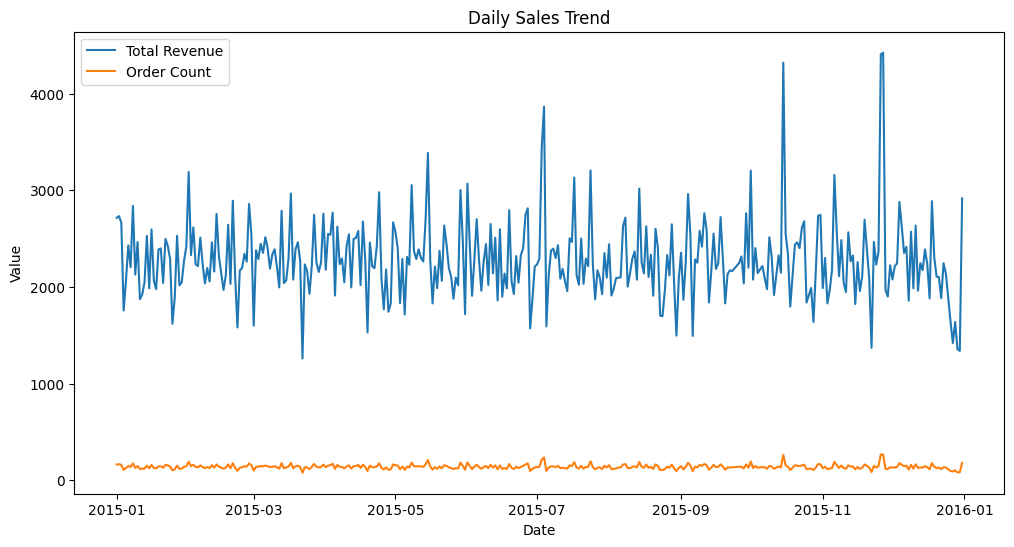

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales['total_revenue'], label='Total Revenue')
plt.plot(daily_sales.index, daily_sales['order_count'], label='Order Count')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Daily Sales Trend')
plt.legend()
plt.show()

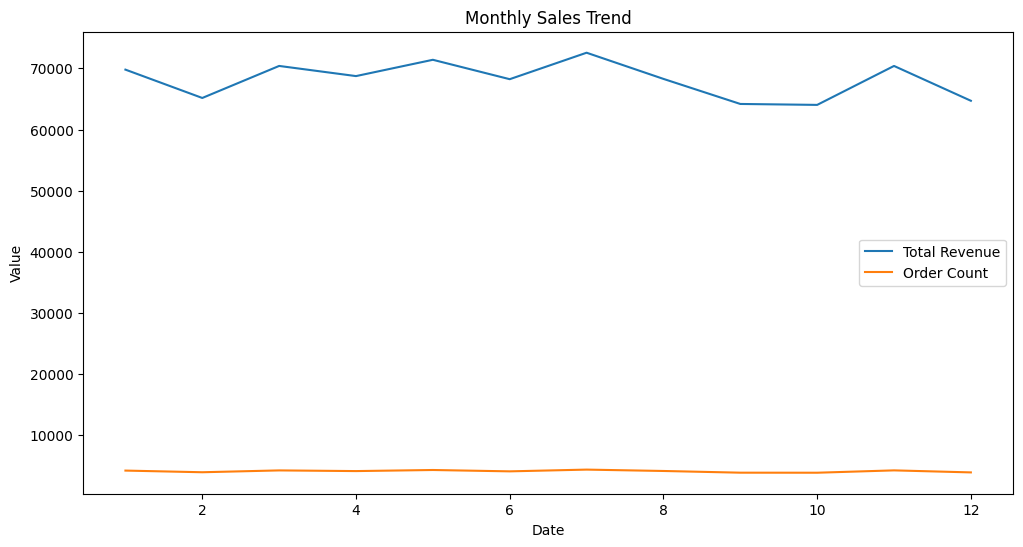

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['total_revenue'], label='Total Revenue')
plt.plot(monthly_sales.index, monthly_sales['order_count'], label='Order Count')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Monthly Sales Trend')
plt.legend()
plt.show()

         total_revenue  order_count
type                               
chicken      195919.50        11050
classic      220053.10        14888
supreme      208197.00        11987
veggie       193690.45        11649
Index(['chicken', 'classic', 'supreme', 'veggie'], dtype='object', name='type')


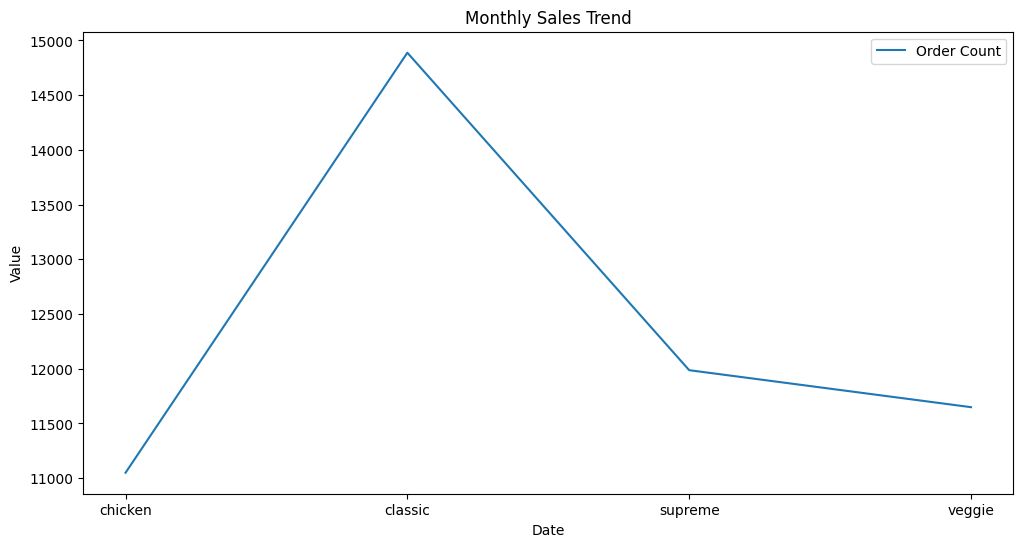

In [43]:
type_sales = df.groupby('type').agg({'price': 'sum', 'id': 'count'}).rename(columns={'price': 'total_revenue', 'id': 'order_count'})
print(type_sales)
plt.figure(figsize=(12, 6))
print(type_sales.index)
plt.plot(type_sales.index, type_sales['order_count'], label='Order Count')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Monthly Sales Trend')
plt.legend()
plt.show()